<h1 id="unicorn">
Unicorn EDA
<a class="anchor-link" href="https://www.kaggle.com/niekvanderzwaag/unicorn-eda/"></a>
</h1>

In business, a **unicorn** is a privately held startup company valued at over $1 billion. The term was first popularised in 2013 by venture capitalist Aileen Lee, choosing the mythical animal to represent the statistical rarity of such successful ventures.

This dataset is a tidied up version of https://www.kaggle.com/ramjasmaurya/unicorn-startups/ shared by @ramjasmaurya 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['figure.dpi'] = 70
sns.set_theme(style='white')
sns.set_palette(palette='Spectral')

In [2]:
unicorn = pd.read_csv('../input/unicorn-startups-cleaned/Unicorn_Clean.csv')

In [3]:
unicorn.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN


In [4]:
unicorn.drop(columns='Unnamed: 0', inplace=True)

In [5]:
unicorn['Date Joined'] = pd.to_datetime(unicorn['Date Joined'])

In [6]:
unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         936 non-null    object        
 1   Valuation ($B)  936 non-null    float64       
 2   Date Joined     936 non-null    datetime64[ns]
 3   Country         936 non-null    object        
 4   City            936 non-null    object        
 5   Industry        936 non-null    object        
 6   Investor 1      936 non-null    object        
 7   Investor 2      890 non-null    object        
 8   Investor 3      806 non-null    object        
 9   Investor 4      7 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 73.2+ KB


Qustions:
- What company are the most valuable?
- What industry are the most valuable?
- What is the segmentation of industry?
- What country produces the most unicorns?
- Which unicorn had the steepest rise?
- Which investors are most succeful?

<h1 id="mvc">
Most Valuable Company
<a class="anchor-link" href="https://www.kaggle.com/niekvanderzwaag/unicorn-eda/"></a>
</h1>

In [7]:
value_top20 = unicorn.sort_values(by='Valuation ($B)', ascending=False).head(20) #top 20 most valuable unicorns

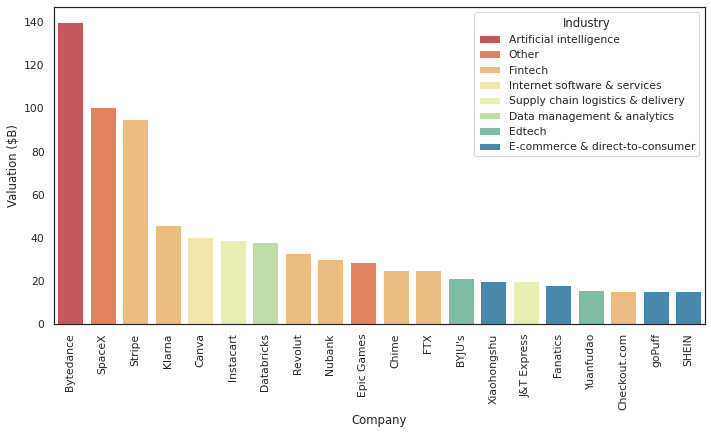

In [8]:
g = sns.barplot(data=value_top20, x = 'Company', y = 'Valuation ($B)', hue = 'Industry', dodge= False, palette = 'Spectral')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<h1 id="mvc">
Most Valuable Industry
<a class="anchor-link" href="https://www.kaggle.com/niekvanderzwaag/unicorn-eda/"></a>
</h1>

In [9]:
industry_value = unicorn.groupby(by='Industry').sum().sort_values(by='Valuation ($B)', ascending=False)

In [10]:
industry_value

,Valuation ($B)
Industry,
Fintech,744.13
Internet software & services,483.76
Artificial intelligence,312.84
E-commerce & direct-to-consumer,291.10
Other,245.46
Health,166.26
Supply chain logistics & delivery,146.29
Data management & analytics,121.70
Cybersecurity,107.54


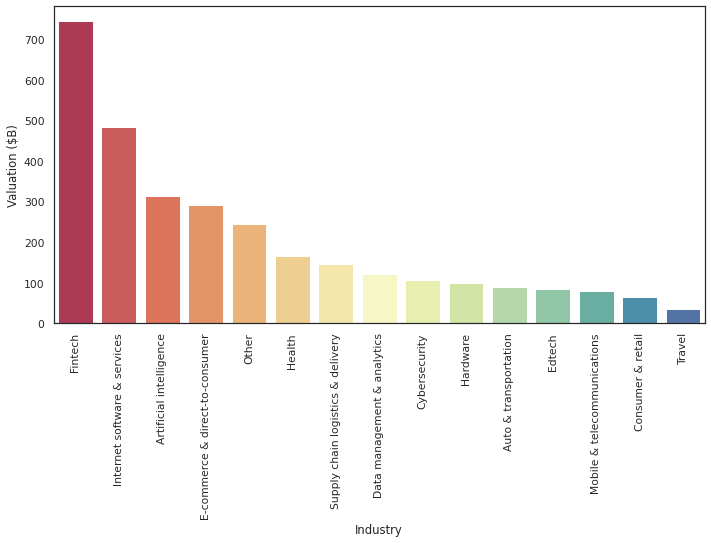

In [11]:
g = sns.barplot(data=industry_value, x = industry_value.index, y = 'Valuation ($B)', palette = 'Spectral')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<h1 id="markseg">
Market Segmentation
    <a class="anchor-link" href="https://www.kaggle.com/niekvanderzwaag/unicorn-eda/"></a>
</h1>

In [12]:
industry_value_per = industry_value['Valuation ($B)'].apply(lambda x: (x/ industry_value.sum()) * 100).round(2)

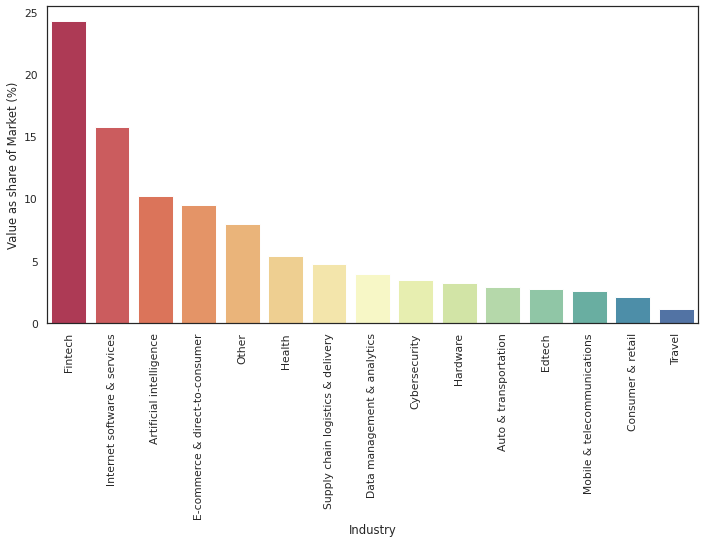

In [13]:
g = sns.barplot(data=industry_value_per, x = industry_value_per.index, y = 'Valuation ($B)', palette = 'Spectral')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel('Value as share of Market (%)');

Close to 25% of the total market value is in Fintech. The top 3 biggest industries make up more than 50% of total market value ($1540 Billion)

In [14]:
industry_value_per.iloc[:3].sum()

Valuation ($B)    50.17
dtype: float64

In [15]:
industry_value.iloc[:3].sum()

Valuation ($B)    1540.73
dtype: float64

<h1 id="country">
Unicorns per Country
<a class="anchor-link" href="https://www.kaggle.com/niekvanderzwaag/unicorn-eda/"></a>
</h1>

In [16]:
country_value = unicorn.groupby(by='Country').sum().sort_values(by='Valuation ($B)', ascending=False).head(20)

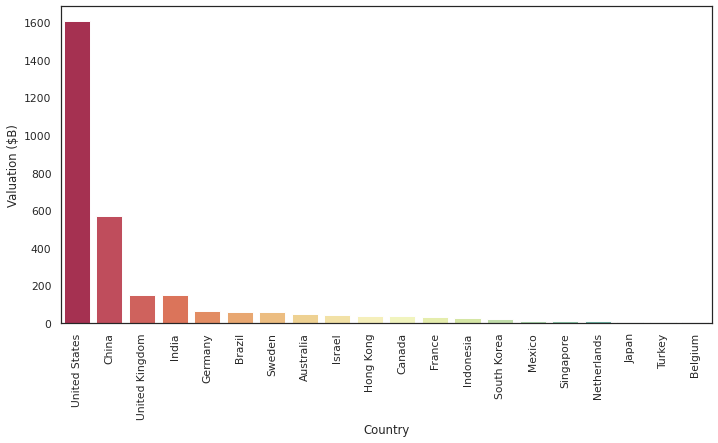

In [17]:
g = sns.barplot(data=country_value, x = country_value.index, y = 'Valuation ($B)', palette = 'Spectral')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [18]:
country_sorted = unicorn['Country'].value_counts().rename_axis('Country').reset_index(name='counts')

In [19]:
country_sorted.head(20)

,Country,counts
0,United States,478
1,China,169
2,India,51
3,United Kingdom,37
4,Germany,23
5,Israel,21
6,France,19
7,Canada,15
8,Brazil,15
9,South Korea,11


In [20]:
country_sorted_per = country_sorted['counts'].apply(lambda x: (x/ country_sorted.counts.sum()) * 100).round(2)

In [21]:
country_sorted_per.head(20) #percentage of total amount of unicorns per country - top 20

0     51.07
1     18.06
2      5.45
3      3.95
4      2.46
5      2.24
6      2.03
7      1.60
8      1.60
9      1.18
10     1.18
11     0.75
12     0.64
13     0.64
14     0.53
15     0.53
16     0.53
17     0.43
18     0.43
19     0.43
Name: counts, dtype: float64

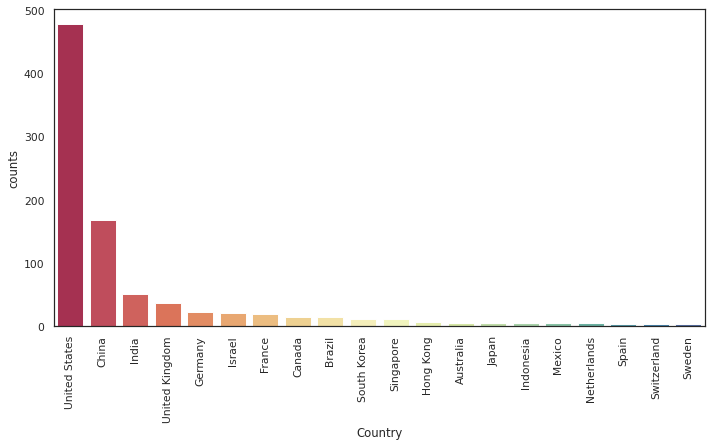

In [22]:
g = sns.barplot(data=country_sorted[:20], x = 'Country', y = 'counts', palette = 'Spectral')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

We see that the vast majority of unicorns reside in the US (51%).

<h1 id="datejoined">
The Rise of the Unicorn
<a class="anchor-link" href="https://www.kaggle.com/niekvanderzwaag/unicorn-eda/"></a>
</h1>

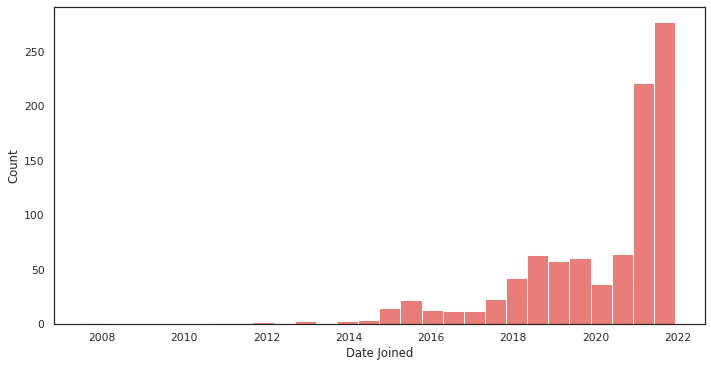

In [23]:
sns.histplot(data=unicorn, x = 'Date Joined');

Clearly, 2021 was the year of the unicorn. I'm curious which companies started earliest.

In [24]:
unicorn.sort_values(by='Date Joined').head(10) #10 oldest unicorns (still private)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
557,Veepee,1.38,2007-07-20,France,La Plaine Saint-Denis,E-commerce & direct-to-consumer,Summit Partners,Qatar Holding,NaN,NaN
224,VANCL,3.00,2010-12-14,China,Beijing,E-commerce & direct-to-consumer,Ceyuan Ventures,QiMing Venture Partners,Temasek Holdings,NaN
99,Vice Media,5.70,2011-04-02,United States,Brooklyn,Internet software & services,Technology Crossover Ventures,A&E Television Networks,NaN,NaN
3,Klarna,45.60,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
349,Trendy Group International,2.00,2012-02-13,Hong Kong,Kowloon,Consumer & retail,L Capital Partners,NaN,NaN,NaN
15,Fanatics,18.00,2012-06-06,United States,Jacksonville,E-commerce & direct-to-consumer,SoftBank Group,Andreessen Horowitz,Temasek Holdings,NaN
1,SpaceX,100.30,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
350,Avant,2.00,2012-12-17,United States,Chicago,Artificial intelligence,RRE Ventures,Tiger Global,August Capital,NaN
482,Mu Sigma,1.50,2013-02-07,United States,Northbrook,Data management & analytics,Sequoia Capital,General Atlantic,NaN,NaN
423,Automattic,1.80,2013-05-27,United States,San Francisco,Internet software & services,Insight Venture Partners,Lowercase Capital,Polaris Partners,NaN


In [25]:
unicorn_2015 = unicorn[unicorn['Date Joined'] > '2014']

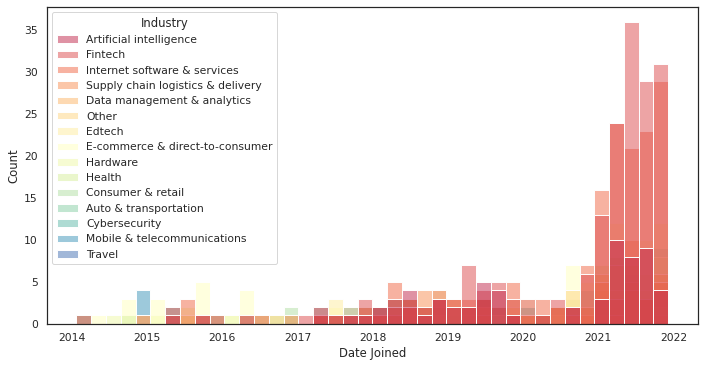

In [26]:
sns.histplot(data=unicorn_2015, x = 'Date Joined', hue = 'Industry', palette = 'Spectral',bins=40);

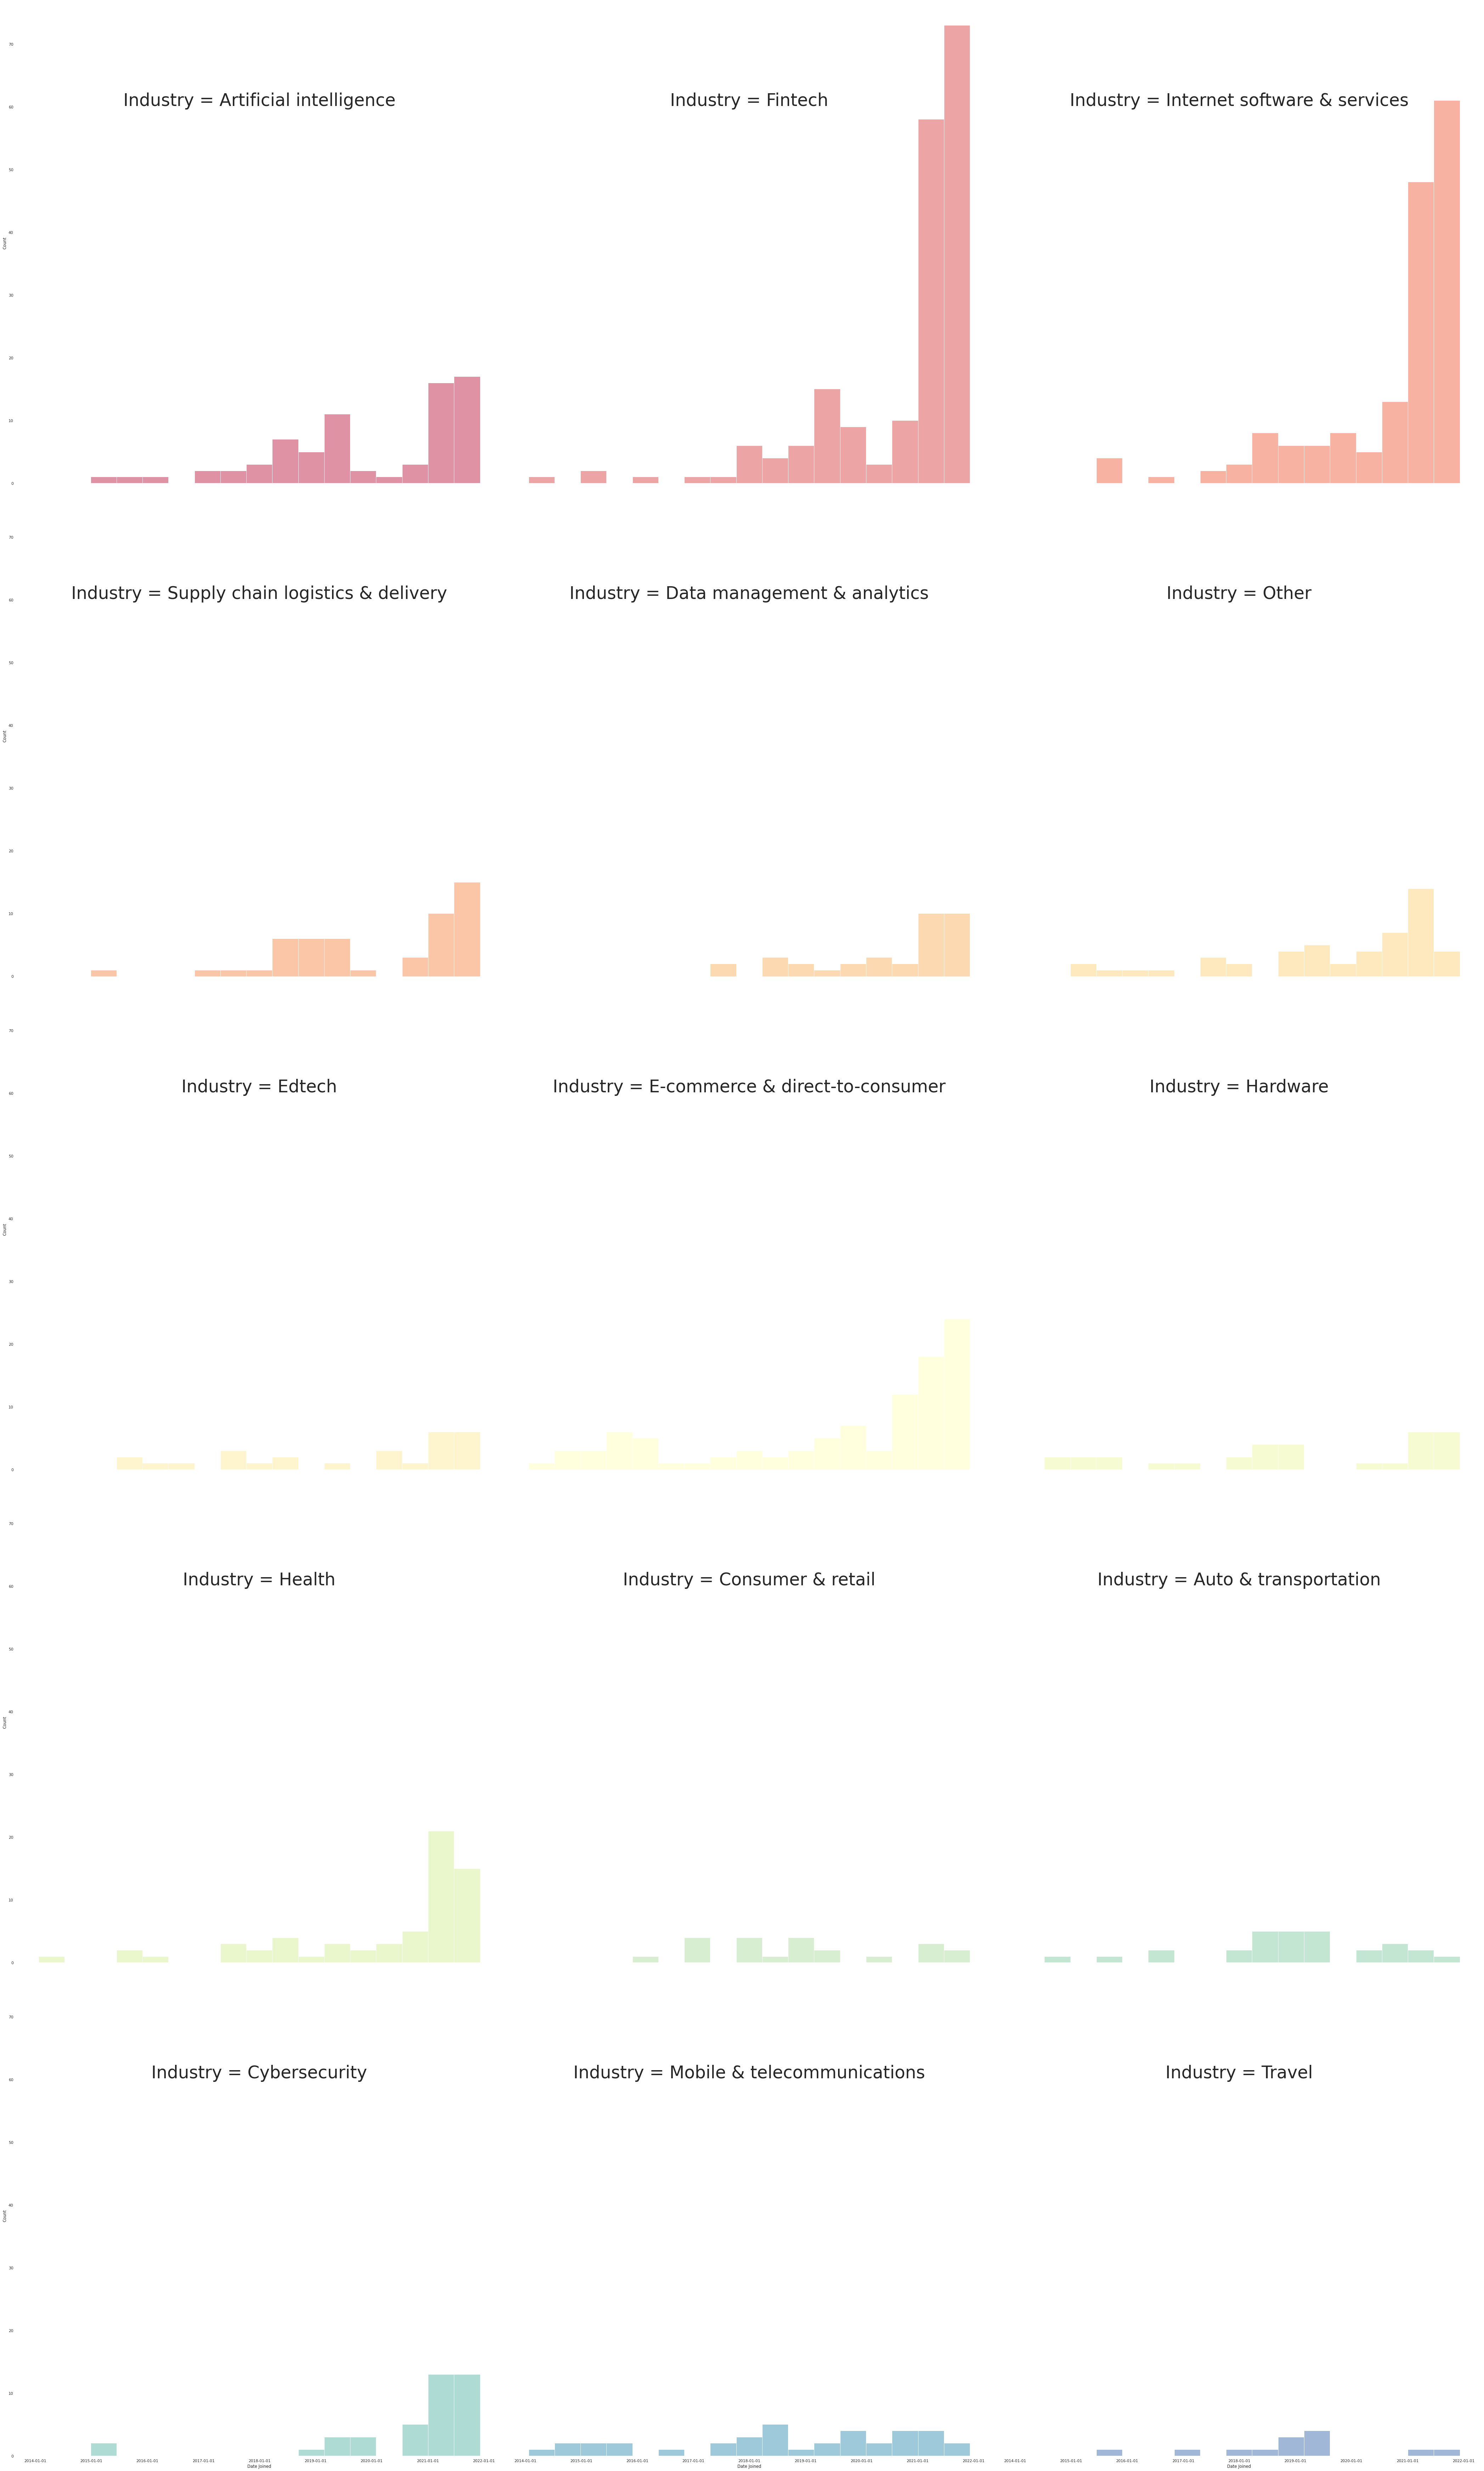

In [27]:
g = sns.displot(data=unicorn_2015, x = 'Date Joined', hue = 'Industry', palette = 'Spectral', legend=False, height=20, col='Industry', col_wrap=3)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=True)
g.set_titles(size=50, pad=-300);

We see the astronomical rise in value of especially Fintech and Internet software & services in the last 5 years.

In [28]:
# rise degree as value of time
unicorn

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN
...,...,...,...,...,...,...,...,...,...,...
931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,RRE Ventures+,Highland Capital Partners,The Carlyle Group,NaN
932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial intelligence,Andreessen Horowitz,Intel Capital,Foundation Capital,NaN
933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,Advent International,Bain Capital Ventures,Silversmith Capital Partners,NaN
934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,KKR,FTV Capital,Ten Eleven Ventures,NaN


Creating time delta column of days since inception as Age

In [29]:
unicorn['Age'] = (datetime.now() - unicorn['Date Joined']).apply(lambda x: x.days)

In [30]:
unicorn['Daily Value ($M)'] = (unicorn['Valuation ($B)'] / unicorn['Age']) * 1000

In [31]:
unicorn.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4,Age,Daily Value ($M)
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,1714,81.680280
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN,3302,30.375530
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN,2884,32.940361
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN,3657,12.469237
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN,1438,27.816412


<AxesSubplot:xlabel='Age', ylabel='Daily Value ($M)'>

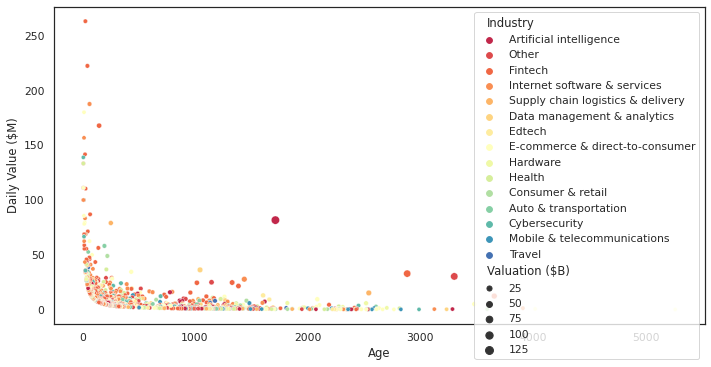

In [32]:
sns.scatterplot(data=unicorn, x = 'Age', y = 'Daily Value ($M)', hue='Industry', size='Valuation ($B)', palette = 'Spectral')

Interesting to see they mostly follow a set line, but there are few outliers. The most valuable unicorns don't seem to follow this trend at all.

In [33]:
unicorn.sort_values(by='Daily Value ($M)', ascending = False).tail(10) #top 10 biggest risers - and likely biggest intial investments

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4,Age,Daily Value ($M)
713,Lamabang,1.00,2015-03-06,China,Shenzhen,E-commerce & direct-to-consumer,5Y Capital,Matrix Partners China,K2VC,NaN,2477,0.403714
712,BeiBei,1.00,2015-01-22,China,Hangzhou,E-commerce & direct-to-consumer,Banyan Capital,New Horizon Capital,IDG Capital Partners,NaN,2520,0.396825
711,Red Ventures,1.00,2015-01-07,United States,Fort Mill,Other,Silver Lake Partners,General Atlantic,NaN,NaN,2535,0.394477
710,LinkSure Network,1.00,2015-01-01,China,Shanghai,Mobile & telecommunications,Haitong Kaiyuan Investment,Northern Light Venture Capital,NaN,NaN,2541,0.393546
660,TangoMe,1.10,2014-03-20,United States,Mountain View,Mobile & telecommunications,Draper Fisher Jurtson,Qualcomm Ventures,Alibaba Group,NaN,2828,0.388967
709,InMobi,1.00,2014-12-02,India,Bengaluru,Mobile & telecommunications,Kleiner Perkins Caufield & Byers,Softbank Corp.,Sherpalo Ventures,NaN,2571,0.388954
708,TechStyle Fashion Group,1.00,2014-08-29,United States,El Segundo,E-commerce & direct-to-consumer,Matrix Partners,Passport Capital,Rho Ventures,NaN,2666,0.375094
707,Snapdeal,1.00,2014-05-21,India,New Delhi,E-commerce & direct-to-consumer,SoftBankGroup,Blackrock,Alibaba Group,NaN,2766,0.361533
706,Lookout,1.00,2013-10-10,United States,San Francisco,Cybersecurity,Accel Partners,Greylock Partners,Lowercase Capital,NaN,2989,0.334560
557,Veepee,1.38,2007-07-20,France,La Plaine Saint-Denis,E-commerce & direct-to-consumer,Summit Partners,Qatar Holding,NaN,NaN,5263,0.262208


Let's create a column to categorize the amount of increased value per day.

In [34]:
bins = [0, 5, 101, 500]
group_names = ['walk','trot','gallop'] #sticking with the unicorn theme
unicorn['Speed'] = pd.cut(unicorn['Daily Value ($M)'], bins, labels=group_names)

In [35]:
unicorn.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4,Age,Daily Value ($M),Speed
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,1714,81.680280,trot
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN,3302,30.375530,trot
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN,2884,32.940361,trot
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN,3657,12.469237,trot
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN,1438,27.816412,trot


<AxesSubplot:xlabel='Age', ylabel='Daily Value ($M)'>

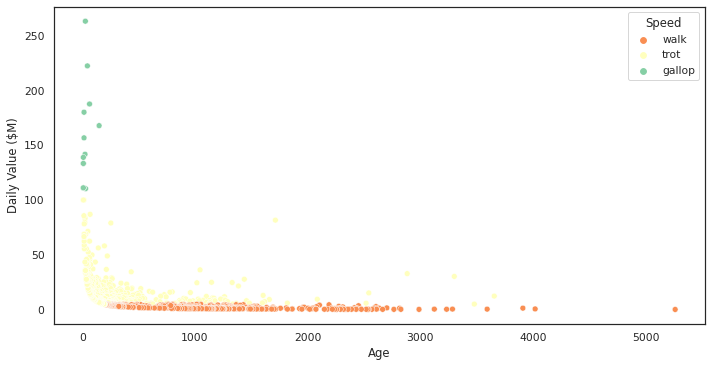

In [36]:
sns.scatterplot(data=unicorn, x = 'Age', y = 'Daily Value ($M)', hue='Speed', palette = 'Spectral')

<h1 id="goals">
Further goals
<a class="anchor-link" href="https://www.kaggle.com/niekvanderzwaag/unicorn-eda/"></a>
</h1>

1. Investing succes - are some venture companies more succesful in laying their bets?
2. Visual cleanup

Work in progress..

Would love to hear your comments, reach out!